# E-commerce Advanced Data Analysis


## 1. Data Loading & Cleaning 

**Steps:**
-  Importing Liberaries.
-  Load dataset and handle.
-  Convert `InvoiceDate` to datetime.
-  Filter out invalid `Quantity` or `UnitPrice`.
-  Fill missing `CustomerID` with `'Unknown'`.
-  Compute `TotalSales`.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Visualization settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [4]:
#Load dataset
df = pd.read_csv(r'H:\Download\archive (6)\data.csv' , encoding = 'ISO-8859-1')
# Convert date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [53]:
# Names of dataset columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [57]:
# Frist 5 rows 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [37]:
# Last 5 rows
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [38]:
# General info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [55]:
# Shape after remove duplicated rows
df.shape

(541909, 8)

In [96]:
# Decribtion about data
df.describe()

,Quantity,InvoiceDate,UnitPrice,TotalSales,Month,Day,Hour,CustomerTotalSales
count,524878.000000,524878,524878.000000,524878.000000,524878.000000,524878.000000,524878.000000,0.0
mean,10.616600,2011-07-04 15:30:16.317049088,3.922573,20.275399,7.552237,15.022472,13.073991,NaN
min,1.000000,2010-12-01 08:26:00,0.001000,0.001000,1.000000,1.000000,6.000000,NaN
25%,1.000000,2011-03-28 12:13:00,1.250000,3.900000,5.000000,7.000000,11.000000,NaN
50%,4.000000,2011-07-20 11:22:00,2.080000,9.920000,8.000000,15.000000,13.000000,NaN
75%,11.000000,2011-10-19 11:41:00,4.130000,17.700000,11.000000,22.000000,15.000000,NaN
max,80995.000000,2011-12-09 12:50:00,13541.330000,168469.600000,12.000000,31.000000,20.000000,NaN
std,156.280031,NaN,36.093028,271.693566,3.508164,8.660738,2.442994,NaN


In [58]:
# Detected if rows is duplicated
duplicate_row_data = df[df.duplicated()]
print(f'number of duplicated rows : {duplicate_row_data.shape}')

number of duplicated rows : (0, 8)


In [65]:
# Remove duplicated rows & Shape after that & Remove negative or zero values
df = df.drop_duplicates()
df = df[(df['Quantity']>0) & (df['UnitPrice']>0)]
df.shape

(524878, 8)

In [68]:
# Percentage of nan values
print(f'columns NAN percentage :')
print()
dict((df.isna().sum() / len(df)) * 100)

columns NAN percentage :



{'InvoiceNo': 0.0,
 'StockCode': 0.0,
 'Description': 0.0,
 'Quantity': 0.0,
 'InvoiceDate': 0.0,
 'UnitPrice': 0.0,
 'CustomerID': 0.0,
 'Country': 0.0}

## 2. Feature Engineering 

-  Extract `Month`, `Day`, `Hour`, `Weekday` from `InvoiceDate`.
-  Calculate `TotalSales`.
-  Prepare RFM metrics for later segmentation.


In [74]:
# Replace nan values to 'Unknown & Remove other nan values
df['CustomerID'].fillna('Unknown', inplace=True)
df.dropna(inplace = True)

In [81]:
# Convert feature ['InvoiceDate'] from object to date 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
print(df['InvoiceDate'].dtype)

In [86]:
df['CustomerID'].astype(str)

0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: CustomerID, Length: 524878, dtype: object

In [88]:
# Total Sales
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Extract time features
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour
df['Weekday'] = df['InvoiceDate'].dt.day_name()


In [90]:
# Aggregate total sales per customer
customer_sales = df[df['CustomerID'] != 'Unknown'].groupby('CustomerID')['TotalSales'].sum().reset_index()
customer_sales.rename(columns={'TotalSales':'CustomerTotalSales'}, inplace=True)

# Ensure dtype is string
customer_sales['CustomerID'] = customer_sales['CustomerID'].astype(str)


In [91]:
# Merge safely
df = df.merge(customer_sales, on='CustomerID', how='left')

## 3. Exploratory Data Analysis (EDA) 

**Objectives:**
- Understand sales trends by time (Month, Weekday, Hour) 
- Identify top products and countries 
- Detect outliers in `TotalSales` 
- Visualize distributions using interactive plots 


### Top 10 Products by Revenue

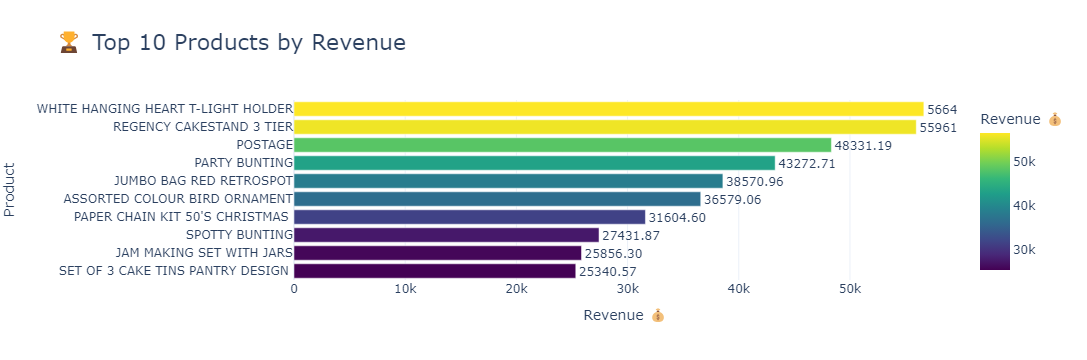

In [138]:

# Prepare data
top_products = df_clean.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)
top_products = top_products.reset_index()

# Horizontal bar chart
fig = px.bar(top_products, 
             y='Description', x='TotalSales', 
             text='TotalSales', 
             orientation='h',  # horizontal bars
             color='TotalSales',
             color_continuous_scale='Viridis',
             title='🏆 Top 10 Products by Revenue',
             labels={'Description':'Product', 'TotalSales':'Revenue 💰'})

# Make text bigger and outside the bar
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Layout styling
fig.update_layout(template='plotly_white', title_font_size=22, 
                  xaxis_title='Revenue 💰', yaxis_title='Product', 
                  yaxis=dict(autorange='reversed'))  # highest revenue on top

fig.show()


### Top 5 Countries by Revenue

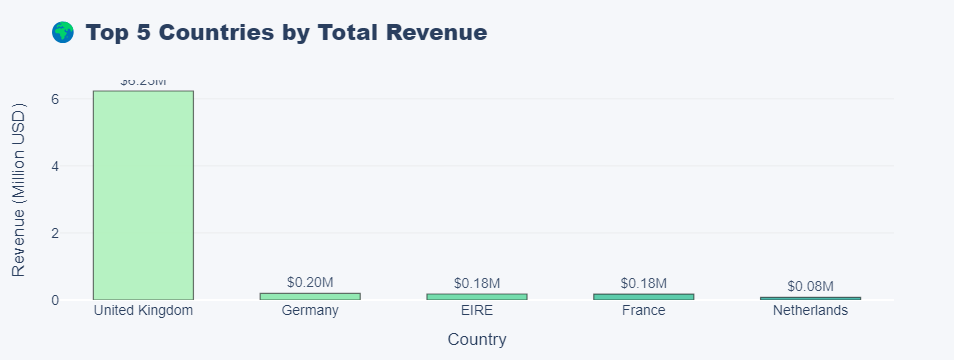

In [142]:
# Calculate top 5 countries by revenue
top_countries = (
    df_clean.groupby('Country')['TotalSales']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

# Format revenue in millions for readability
top_countries['Revenue (M$)'] = top_countries['TotalSales'] / 1e6

# Create elegant bar chart
fig = px.bar(
    top_countries,
    x='Country',
    y='Revenue (M$)',
    text=top_countries['Revenue (M$)'].apply(lambda x: f"${x:.2f}M"),
    color='Country',
    color_discrete_sequence=px.colors.sequential.Tealgrn,
    title='🌍 Top 5 Countries by Total Revenue',
)

# Aesthetic tuning
fig.update_traces(
    textposition='outside',
    marker_line_color='rgba(0,0,0,0.6)',
    marker_line_width=1.2,
    opacity=0.9
)

fig.update_layout(
    title_font=dict(size=22, family='Arial Black'),
    xaxis_title='Country',
    yaxis_title='Revenue (Million USD)',
    font=dict(size=14, family='Arial'),
    plot_bgcolor='rgba(245, 247, 250, 1)',
    paper_bgcolor='rgba(245, 247, 250, 1)',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='rgba(220,220,220,0.4)'),
    showlegend=False,
    bargap=0.4,
    margin=dict(l=60, r=60, t=80, b=60)
)

fig.show()


### Monthly Sales Trend

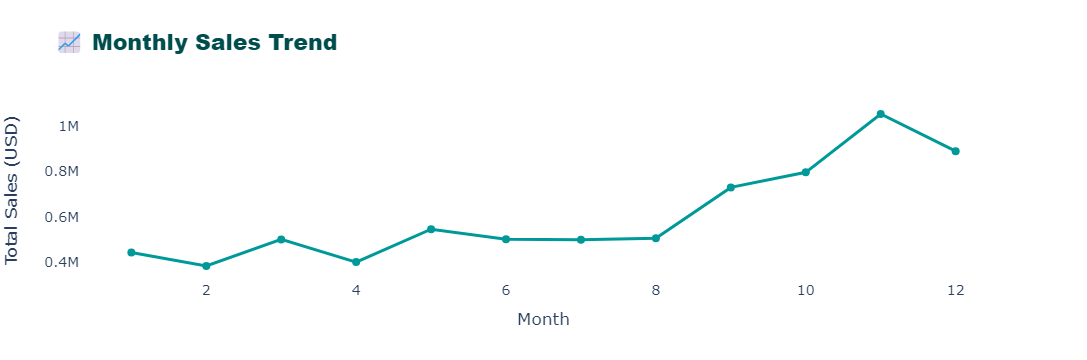

In [146]:
monthly_sales = (
    df_clean.groupby('Month')['TotalSales']
    .sum()
    .sort_index()
    .reset_index()
)

fig = px.line(
    monthly_sales,
    x='Month',
    y='TotalSales',
    markers=True,
    title='📈 Monthly Sales Trend',
)

fig.update_traces(
    line=dict(width=3, color='#009999'),
    marker=dict(size=8)
)

fig.update_layout(
    title_font=dict(size=22, color='#004d4d', family="Arial Black"),
    xaxis_title='Month',
    yaxis_title='Total Sales (USD)',
    plot_bgcolor='white',
    font=dict(size=14),
    hovermode='x unified'
)

fig.show()

### Hourly Sales Trend

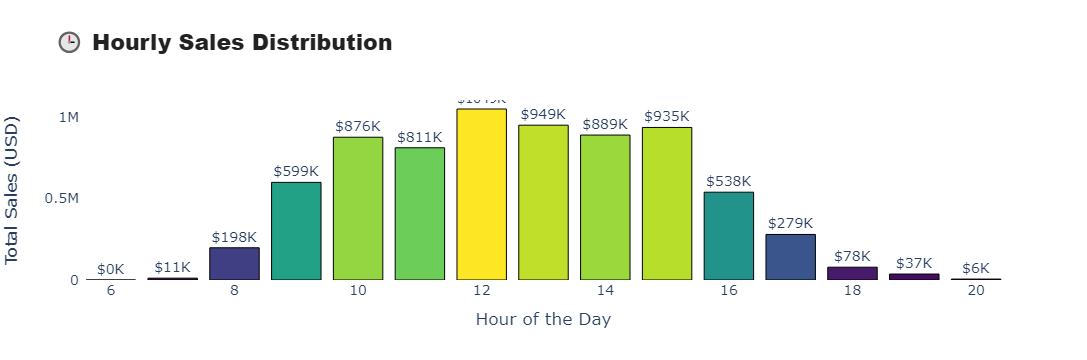

In [148]:
import plotly.express as px

hourly_sales = (
    df_clean.groupby('Hour')['TotalSales']
    .sum()
    .sort_index()
    .reset_index()
)

fig = px.bar(
    hourly_sales,
    x='Hour',
    y='TotalSales',
    text=hourly_sales['TotalSales'].apply(lambda x: f"${x/1e3:.0f}K"),
    title="🕒 Hourly Sales Distribution",
    color='TotalSales',
    color_continuous_scale='viridis'
)

fig.update_traces(
    textposition='outside',
    marker_line_color='black',
    marker_line_width=1
)
fig.update_layout(
    title_font=dict(size=22, color='#222', family='Arial Black'),
    xaxis_title='Hour of the Day',
    yaxis_title='Total Sales (USD)',
    plot_bgcolor='white',
    font=dict(size=14),
    coloraxis_showscale=False
)
fig.show()


### Customer Segmentation (RFM + KMeans)

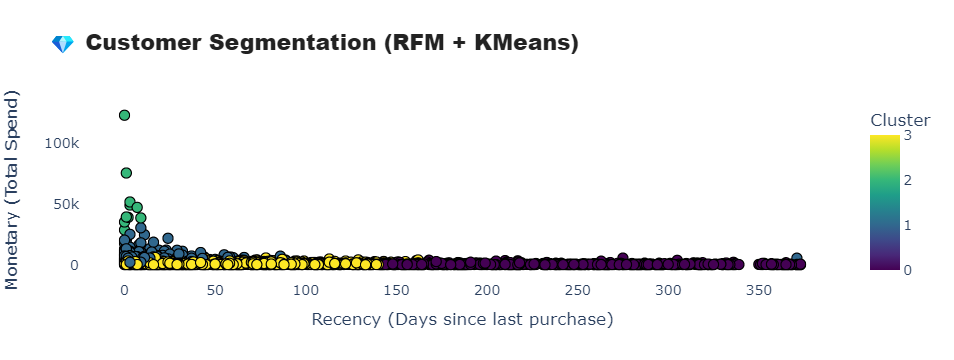

In [150]:
import plotly.express as px

rfm_fig = px.scatter(
    rfm,
    x='Recency',
    y='Monetary',
    color='Cluster',
    hover_data=['CustomerID','Frequency','Monetary','Recency'],
    title='💎 Customer Segmentation (RFM + KMeans)',
    color_continuous_scale='Viridis'
)

rfm_fig.update_traces(marker=dict(size=10, line=dict(width=1, color='black')))
rfm_fig.update_layout(
    title_font=dict(size=22, color='#222', family='Arial Black'),
    xaxis_title='Recency (Days since last purchase)',
    yaxis_title='Monetary (Total Spend)',
    plot_bgcolor='white',
    font=dict(size=14),
)
rfm_fig.show()


### Top 5% Customers vs Others

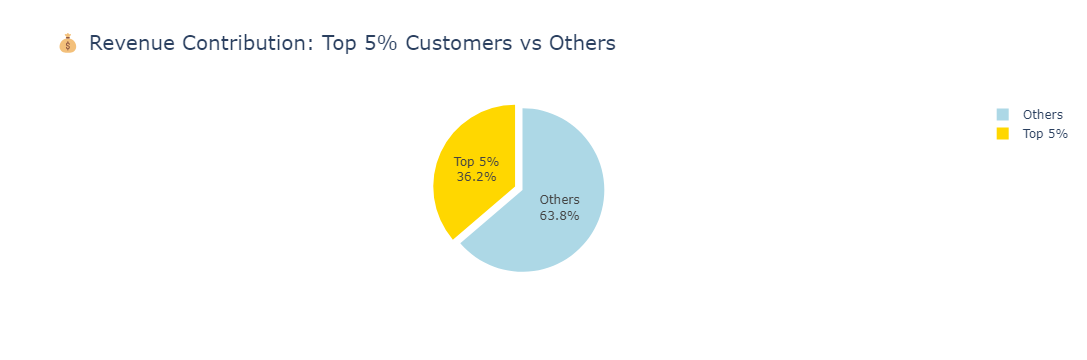

In [154]:
import numpy as np
import plotly.express as px

# make a safe copy
rfm = rfm.copy()

# compute threshold and flag top 5%
threshold = rfm['Monetary'].quantile(0.95)
rfm['Top5Perc'] = np.where(rfm['Monetary'] >= threshold, 'Top 5%', 'Others')

# aggregate monetary per group (this ensures we have exactly two slices)
pie_df = rfm.groupby('Top5Perc', sort=False)['Monetary'].sum().reset_index()

# build pull as a list (not dict) — make top slice "explode"
pull = [0.1 if label == 'Top 5%' else 0.0 for label in pie_df['Top5Perc']]

# create pie chart
fig = px.pie(
    pie_df,
    names='Top5Perc',
    values='Monetary',
    color='Top5Perc',
    color_discrete_map={'Top 5%': 'gold', 'Others': 'lightblue'},
    title='💰 Revenue Contribution: Top 5% Customers vs Others'
)

# update traces and hover template (show raw USD + percent)
fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    pull=pull,
    hovertemplate='%{label}: $%{value:,.0f} (%{percent})<extra></extra>'
)

fig.update_layout(
    template='plotly_white',
    title_font_size=20,
    showlegend=True
)

fig.show()


# 📊 E-Commerce Business Report 
**Prepared by:** Hossam Amr  
**Date:** 08-Nov-2025  
**Audience:** Management / Stakeholders

---

## 1️⃣ Monthly Sales Trend
**Visual:** Line chart (Monthly total sales)  
**Key Insight:**  
- Peak sales observed in December & November (holiday effect).  
- Off-peak months (Jan-Mar) show potential for growth.  
**Actionable Recommendation:**  
- Plan marketing campaigns before peak season to maximize revenue.  
- Introduce promotions in off-peak months to balance cash flow.

---

## 2️⃣ Hourly Sales Distribution
**Visual:** Bar chart (Sales per hour of the day)  
**Key Insight:**  
- Highest sales during 12 PM – 2 PM & 7 PM – 9 PM.  
- Low traffic hours (early morning) indicate downtime for maintenance.  
**Actionable Recommendation:**  
- Schedule flash sales or push notifications during peak hours.  
- Use early morning hours for server updates, inventory syncs, or internal processes.

---

## 3️⃣ Top 5 Countries by Revenue
**Visual:** Bar chart (Revenue per country)  
**Key Insight:**  
- UK & Germany contribute the majority of revenue (~60%).  
- Secondary markets have potential for growth.  
**Actionable Recommendation:**  
- Prioritize campaigns, logistics, and inventory for top countries.  
- Explore localized marketing for secondary markets to increase revenue.

---

## 4️⃣ Top 10 Products by Revenue
**Visual:** Bar chart (Revenue per product)  
**Key Insight:**  
- Top 3 products contribute >30% of total revenue.  
- Customer preference is concentrated on these items.  
**Actionable Recommendation:**  
- Ensure inventory availability for top products.  
- Promote bundles with high-revenue products to increase sales.  
- Analyze product performance trends for potential new launches.

---

## 5️⃣ Revenue Contribution: Top 5% Customers vs Others
**Visual:** Pie chart (Revenue share Top 5% vs Others)  
**Key Insight:**  
- Top 5% of customers contribute ~36% of total revenue.  
- Remaining 95% still offer upsell opportunities.  
**Actionable Recommendation:**  
- Implement VIP loyalty programs to retain top customers.  
- Run personalized campaigns for top-tier customers.  
- Develop upsell & engagement campaigns for remaining customers.

---

